In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [3]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

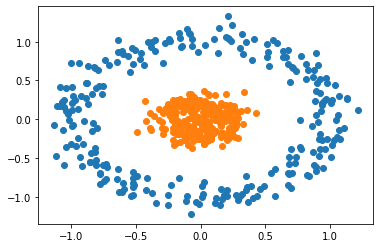

In [4]:
scatter_plot()

In [5]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):  # H1 is the hidden layer
    super().__init__()
    self.linear = nn.Linear(input_size, H1) # input connected to hidden layer first.
    self.linear2 = nn.Linear(H1, output_size) # hidden layer to output.
  def forward(self, x):
    x = torch.sigmoid(self.linear(x)) # 1st forward prop
    x = torch.sigmoid(self.linear2(x)) # resukt of 1st passed to next forward prop.
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else: 
      return 0

In [6]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [7]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [8]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 0.7148520350456238
epoch: 1 loss 0.6947316527366638
epoch: 2 loss 0.6955162286758423
epoch: 3 loss 0.7014890313148499
epoch: 4 loss 0.7013982534408569
epoch: 5 loss 0.697470486164093
epoch: 6 loss 0.693925678730011
epoch: 7 loss 0.6928598284721375
epoch: 8 loss 0.6939383149147034
epoch: 9 loss 0.6954388618469238
epoch: 10 loss 0.6958757042884827
epoch: 11 loss 0.6949177384376526
epoch: 12 loss 0.6931492686271667
epoch: 13 loss 0.6913899183273315
epoch: 14 loss 0.6901613473892212
epoch: 15 loss 0.6894590258598328
epoch: 16 loss 0.688843309879303
epoch: 17 loss 0.6877669095993042
epoch: 18 loss 0.6859007477760315
epoch: 19 loss 0.6832481622695923
epoch: 20 loss 0.6800420880317688
epoch: 21 loss 0.6765591502189636
epoch: 22 loss 0.6729681491851807
epoch: 23 loss 0.6692698001861572
epoch: 24 loss 0.6653285622596741
epoch: 25 loss 0.6609662771224976
epoch: 26 loss 0.6560585498809814
epoch: 27 loss 0.6505835056304932
epoch: 28 loss 0.6446025967597961
epoch: 29 loss 0.6381981968

Text(0.5, 0, 'epoch')

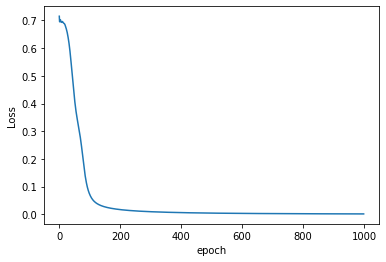

In [9]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [10]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

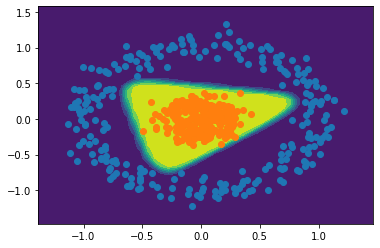

In [11]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


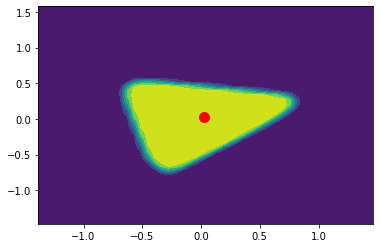

In [12]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(X, y)